In [1]:
!pip install geopy

In [2]:
# Import pandas
import pandas as pd
import geocoder as gc
from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

# Import BoxPlot, output_notebook, and show from bokeh.charts
from bokeh.charts import BoxPlot, Donut, Bar, Histogram, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import ColumnDataSource


In [3]:
# Assign spreadsheet filename: file
file = 'imd_student_blind.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Sheet1']


In [4]:
# Load a sheet into a DataFrame by index: df
df = xl.parse(0)

# Print the head of the DataFrame df
df.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enem-matematica,enem-nota,enem-redacao,enen-nota
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,2172,0,640,618.0
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,2172,0,640,618.0
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,1955,0,660,615.0
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,1959,0,560,600.0
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,2235,0,760,673.0


In [5]:
df.columns

Index(['a_ID', 'CEP', 'ano_ingresso', 'periodo_ingresso', 'status',
       'ano_disciplina', 'periodo_disciplina', 'nota', 'disciplina_ID',
       'status.disciplina', 'enem-matematica', 'enem-nota', 'enem-redacao',
       'enen-nota'],
      dtype='object')

In [6]:
df.shape

(4842, 14)

In [7]:
#Cópia por valores, não mexer no DF principal
disciplinas = df.copy()

disciplinas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4841
Data columns (total 14 columns):
a_ID                  4842 non-null int64
CEP                   4842 non-null int64
ano_ingresso          4842 non-null int64
periodo_ingresso      4842 non-null int64
status                4842 non-null object
ano_disciplina        4842 non-null int64
periodo_disciplina    4842 non-null int64
nota                  4842 non-null float64
disciplina_ID         4842 non-null int64
status.disciplina     4842 non-null object
enem-matematica       4842 non-null int64
enem-nota             4842 non-null int64
enem-redacao          4842 non-null int64
enen-nota             4553 non-null float64
dtypes: float64(2), int64(10), object(2)
memory usage: 567.4+ KB


In [8]:
disciplinas.columns.values.tolist()

['a_ID',
 'CEP',
 'ano_ingresso',
 'periodo_ingresso',
 'status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina',
 'enem-matematica',
 'enem-nota',
 'enem-redacao',
 'enen-nota']

In [9]:
#Retira informações desnecessárias para essa análise

disciplinas.drop(disciplinas.columns[0:4], axis=1, inplace=True)

In [10]:
#Objetivo 1 -> Média da disciplina X por período e ano
#Objetivo 2 -> Taxa de trancamento e cancelamento por período e ano
disciplinas.columns.values.tolist()

['status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina',
 'enem-matematica',
 'enem-nota',
 'enem-redacao',
 'enen-nota']

In [11]:
disciplinas = disciplinas[disciplinas['status'] == 'ATIVO']
disciplinas.head()

,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enem-matematica,enem-nota,enem-redacao,enen-nota
3,ATIVO,2014,2,6.1,0,Aprovado,1959,0,560,600.0
4,ATIVO,2014,1,3.0,0,Reprovado,2235,0,760,673.0
5,ATIVO,2014,2,7.2,0,Aprovado,2235,0,760,673.0
8,ATIVO,2014,2,8.9,0,Aprovado,1991,0,520,581.0
12,ATIVO,2014,2,5.6,0,Aprovado,1923,0,720,647.0


In [12]:
disciplinas_categorias =  disciplinas.groupby(['ano_disciplina', 'periodo_disciplina', 'disciplina_ID']).mean()

# convert the index to a column
disciplinas_categorias.reset_index(inplace = True )
disciplinas_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
ano_disciplina        42 non-null int64
periodo_disciplina    42 non-null int64
disciplina_ID         42 non-null int64
nota                  42 non-null float64
enem-matematica       42 non-null float64
enem-nota             42 non-null float64
enem-redacao          42 non-null float64
enen-nota             42 non-null float64
dtypes: float64(5), int64(3)
memory usage: 2.7 KB


In [13]:
disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == 0]

,ano_disciplina,periodo_disciplina,disciplina_ID,nota,enem-matematica,enem-nota,enem-redacao,enen-nota
0,2014,1,0,5.872727,1343.090909,0.0,520.000000,666.625000
6,2014,2,0,5.625676,1992.689189,0.0,666.216216,645.540541
13,2015,1,0,6.126316,1883.736842,0.0,622.105263,641.555556
19,2015,2,0,5.486555,2027.983193,0.0,654.621849,641.644068
26,2016,1,0,4.139394,1779.595960,0.0,588.080808,619.681319
33,2016,2,0,5.750758,1828.696970,0.0,622.878788,635.731707


In [14]:
# Make a box plot: p
p = BoxPlot(disciplinas_categorias, values='nota', label='disciplina_ID', color='disciplina_ID',
             title='Distribuição da média de notas das disciplinas',
             legend='bottom_right')

# Set the y axis label
p.yaxis.axis_label='Média por período'
p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))

# Call the output_notebook() 
output_notebook()
show(p)

Loading BokehJS ...

In [15]:
ps = []
#tbs = []

for atual in range(0,7):
    p = BoxPlot(disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == atual], values='nota', label='periodo_disciplina',
                        color='periodo_disciplina', title='Ddisciplina '+str(atual), legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    
# Make a box plot: p


# Set the y axis label

grid = gridplot([ps[0:2], ps[2:4], ps[4:6], [None, ps[6]]], sizing_mode='scale_width')
#grid = gridplot([[ps[0], ps[1]], [ps[2], ps[3]], [ps[4], ps[5]], [None, ps[6]]], sizing_mode='scale_width')

#tabs = Tabs(tabs=[ tbs[0], tbs[5] ],sizing_mode='scale_width' )

#show(tabs)
# show the results
show(grid)

In [16]:
##Quantidade de alunos ativos/Trancados/cancelados/...
count_series = pd.DataFrame(columns=('Status', 'Count'))
count_series["Status"] = df["status"].unique().tolist()
tam = len(df)

for atual in range(0,len(count_series)):
    count_series.iloc[atual]["Count"] = df[df["status"] == count_series.iloc[atual]["Status"]]["status"].count()

def porcent(val):
    p = (val*100)/tam
    return p
    
graph = Donut(count_series, label="Status", values="Count", title="Situação dos alunos" )
graph.add_tools(HoverTool(tooltips=[("Alunos", str(count_series.iloc[1]["Count"])+"/"+str(tam)), #falta trocar o 1 pelo número de alunos da categoria
                                    ("Porcentagem", str(porcent(1000))) #falta trocar o 1000 pelo numero de alunos da categoria
                                   ]
                         ))

show(graph)

In [17]:
###Verificar desistência
def popula(string):
    aux = []
    for atual in range (2014, 2017):
        aux.append(df[df["ano_ingresso"] == atual][df["status"] == string]["status"].count())
    return aux

count_desist = pd.DataFrame(columns=('ANO', 'CANCELADO', 'ATIVO', 'TRANCADO', 'CONCLUIDO', 'FORMANDO', 'FORMADO'))
count_desist["ANO"] = [2014, 2015, 2016]

for atual in count_desist.columns.values:
    if atual != "ANO":
        count_desist[atual] = popula(atual)

print(count_desist)



C:\Users\ivana\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    ANO  CANCELADO  ATIVO  TRANCADO  CONCLUIDO  FORMANDO  FORMADO
0  2014        584    843       112         13        38       10
1  2015        329   1530       114          7         0        0
2  2016        134   1067        56          0         5        0


In [18]:

BLEND = blend('CANCELADO', "ATIVO",  "TRANCADO",  "CONCLUIDO",  "FORMANDO",  "FORMADO",
              name='unidade', labels_name='Situacao')

bar = Bar(count_desist, values=BLEND,
          label=cat(columns='ANO', sort=False),
          stack=cat(columns='Situacao', sort=False),
          color="Situacao",
          legend='bottom_center',
          title="Índice de formação e desitencia de alunos por ano",
          ylabel = "Alunos",
          tooltips=[('Tipo', "$y")]) ##Corrigir isso também

output_notebook()

show(bar)

Loading BokehJS ...

In [19]:
###Verificar NOtas ENEM
ps = []
temp = ["nota", "enen-nota", "enem-matematica", "enem-redacao"]

for atual in range(0, len(temp)):
    p = BoxPlot(disciplinas_categorias, values=temp[atual], label='disciplina_ID',
                        color='disciplina_ID', title=str(temp[atual])+" x Desempenho em disciplinas ", legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y{f.fff}")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    

grid = gridplot([ps[0:2], ps[2:4]], sizing_mode='scale_width')

output_notebook()
show(grid)

Loading BokehJS ...

In [20]:
#Verificar distancias
distancias = df[df["status"] == "ATIVO"].copy()
distancias["LAT"], distancias["LON"], distancias["KM"] = [0,0,0]
distancias = distancias.reset_index()
uf = gc.google("59064741").latlng

for i in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    st = distancias.loc[i,'CEP']
    g = gc.google(st)
    if g.lat == None:
        distancias.loc[i, "LAT"] = 0
    elif g.lng == None:
        distancias.loc[i, "LON"] = 0
    else:
        distancias.loc[i, "LON"] = g.lng
        distancias.loc[i, "LAT"] = g.lat
print("Completo")

distancias.to_csv('LatLong_Alunos.csv', encoding="utf-8")
##Salva tabela criada
    
#UFRN 59064-741
distancias.head()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:16<00:00,  1.28it/s]


Completo


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enem-matematica,enem-nota,enem-redacao,enen-nota,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,1959,0,560,600.0,-5.832998,-35.242542,0
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,2235,0,760,673.0,-5.872282,-35.206600,0
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,2235,0,760,673.0,-5.872282,-35.206600,0
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,1991,0,520,581.0,-5.750546,-35.258952,0
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,1923,0,720,647.0,-5.798325,-35.202731,0


In [23]:
distancias =  pd.read_csv('LatLong_Alunos.csv', encoding="utf-8", index_col=0)
    
for atual in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    lt = distancias.loc[atual, "LAT"]
    ln = distancias.loc[atual, "LON"]
    if lt != 0. and ln != 0.:
        compare = (lt, ln)
        #print(vincenty(uf, compare).km)
        distancias.loc[atual, "KM"] = vincenty(uf, compare).km
    
distancias.head()

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 472.40it/s]


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enem-matematica,enem-nota,enem-redacao,enen-nota,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,1959,0,560,600.0,-5.832998,-35.242542,3.451075
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,2235,0,760,673.0,-5.872282,-35.206600,4.027258
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,2235,0,760,673.0,-5.872282,-35.206600,4.027258
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,1991,0,520,581.0,-5.750546,-35.258952,10.830276
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,1923,0,720,647.0,-5.798325,-35.202731,4.301033


# Daqui para baixo é tudo teste, pode apagar tudo

In [31]:
disciplinas_categorias.head()

,ano_disciplina,periodo_disciplina,disciplina_ID,nota,enem-matematica,enem-nota,enem-redacao,enen-nota
0,2014,1,0,5.872727,1343.090909,0.0,520.000000,666.625000
1,2014,1,1,6.810870,1953.076087,0.0,656.956522,648.966292
2,2014,1,2,6.957333,1983.160000,0.0,670.666667,645.093333
3,2014,1,3,3.325000,2117.375000,0.0,685.000000,683.625000
4,2014,1,5,4.233333,1786.388889,0.0,518.888889,686.000000


In [22]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save", background_fill_color="#E8DDCB")

measured = disciplinas_categorias["nota"]
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0, 10, 1) #range do eixo X
#pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
#cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#036564", line_color="#033649")
#p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
#p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "top_left"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'


output_notebook()

show(gridplot(p1, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Populating the interactive namespace from numpy and matplotlib


C:\Users\ivana\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'grid', 'hist', 'beta', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


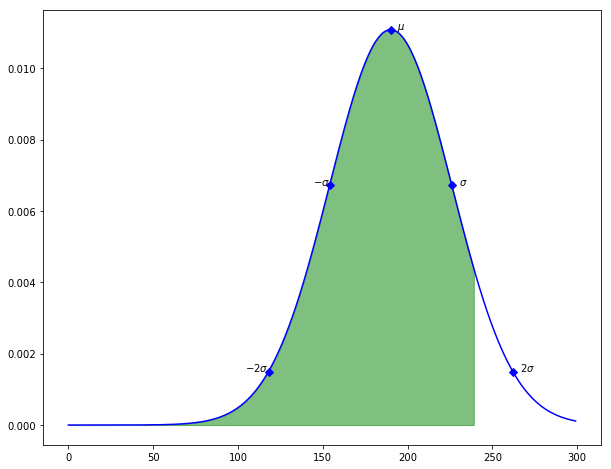

0.9175667301260455

In [81]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

## points under study
xi = 240
mean_face = 190
std_face = 36
axis_x = range(0,300)

## return the cumulative value from Z-Table
cdf = stats.norm.cdf(240, mean_face, std_face)

## -2std, -std, std, 2std 
minus2std = mean_face - 2*std_face
minusstd = mean_face - std_face
plus1std = mean_face + std_face
plus2std = mean_face + 2*std_face

## mark points in the plot
markers_points = [minus2std, minusstd, mean_face, plus1std, plus2std]

## find the probability distribution function
pdf = stats.norm.pdf(axis_x,mean_face,std_face)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
plt.annotate('$\mu$',xy=(mean_face+4,pdf[mean_face]))
plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)

plt.show()

cdf


In [39]:

geolocator = Nominatim()
location = geolocator.geocode("Brasil")
print(location.address)

Brasil


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.28s/it]


[[-5.816641100000001, -35.2000152],
 [-5.816641100000001, -35.2000152],
 [-5.8533365, -35.25280420000001],
 [-5.832998099999999, -35.2425418],
 [-5.8722825, -35.2065995],
 [-5.8722825, -35.2065995],
 [],
 [],
 [-5.7505465, -35.2589518],
 [-5.894041199999999, -35.2071449]]

[-5.836203299999999, -35.2115447]

2.5120246980208445
2.5120246980208445
4.946519622508101
3.4510748666617537
4.027257627499759
4.027257627499759
3965.674030859573
3965.674030859573
10.830275673189615
6.4145859944065196
